## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
import os 
os.environ['KMP_LIS_OK']='True'

## Data Prosessing

### training Image preprocessing


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)


Found 70295 files belonging to 38 classes.


## Validation Image Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)


Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[166.   152.   152.  ]
   [165.   151.   151.  ]
   [158.25 144.25 144.25]
   ...
   [166.25 152.25 152.25]
   [166.   152.   152.  ]
   [156.75 142.75 142.75]]

  [[154.   140.   140.  ]
   [156.   142.   142.  ]
   [149.75 135.75 135.75]
   ...
   [158.25 144.25 144.25]
   [163.   149.   149.  ]
   [143.25 129.25 129.25]]

  [[158.25 144.25 144.25]
   [159.   145.   145.  ]
   [164.5  150.5  150.5 ]
   ...
   [158.5  144.5  144.5 ]
   [154.75 140.75 140.75]
   [158.75 144.75 144.75]]

  ...

  [[161.75 151.75 150.75]
   [160.25 150.25 149.25]
   [178.   168.   167.  ]
   ...
   [152.25 140.25 140.25]
   [163.25 151.25 151.25]
   [171.   159.   159.  ]]

  [[141.   131.   130.  ]
   [172.5  162.5  161.5 ]
   [170.   160.   159.  ]
   ...
   [155.25 143.25 143.25]
   [169.25 157.25 157.25]
   [167.5  155.5  155.5 ]]

  [[156.   146.   145.  ]
   [170.   160.   159.  ]
   [166.75 156.75 155.75]
   ...
   [153.25 141.25 141.25]
   [149.5  137.5  137.5 ]
   [150.5  138.5  13

### To avoid Overshooting 
1. choose small learning rate default 0.001 we are taking 0.0001
2. there may be chance of underfilterning, so increase number of neuron
3. add more convolucation layer to extract more feature from images

## Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

## Building Convolucation

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Asus\.conda\envs\new_tf\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) #to avoid over fiting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [113]:
model.save("train_model.keras")

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5981s 3s/step - accuracy: 0.2538 - loss: 2.6707 - val_accuracy: 0.7056 - val_loss: 0.9209
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6329s 3s/step - accuracy: 0.7098 - loss: 0.9142 - val_accuracy: 0.7682 - val_loss: 0.7525
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7754s 4s/step - accuracy: 0.8007 - loss: 0.6264 - val_accuracy: 0.8651 - val_loss: 0.4160
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5518s 3s/step - accuracy: 0.8384 - loss: 0.5102 - val_accuracy: 0.8520 - val_loss: 0.4583
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6457s 3s/step - accuracy: 0.8548 - loss: 0.4566 - val_accuracy: 0.8730 - val_loss: 0.3979
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 55777s 25s/step - accuracy: 0.8611 - loss: 0.4365 - val_accuracy: 0.8751 - val_loss: 0.4078
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3822s 2s/step - accuracy: 0.8678 - loss: 0.4121 - val_accuracy: 0.8520 - val_loss: 0.4747
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3269s 1s/step - accuracy: 0.8690

In [23]:
### Model Evoluation

In [24]:
## model evoluation on Training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1295s 589ms/step - accuracy: 0.9087 - loss: 0.2826


In [25]:
print(train_loss,train_acc)

0.26459017395973206 0.9132370948791504


In [26]:
## model evoluation on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 335s 608ms/step - accuracy: 0.8834 - loss: 0.3819


In [27]:
print(train_loss,train_acc)

0.26459017395973206 0.9132370948791504


In [28]:
##Saving model

In [112]:
model.save("trained_model.keras")

In [30]:
training_history.history

{'accuracy': [0.43781208992004395,
  0.7432676553726196,
  0.8132014870643616,
  0.8404865264892578,
  0.8548972010612488,
  0.8607439994812012,
  0.867117166519165,
  0.8727363348007202,
  0.8797496557235718,
  0.8771036267280579],
 'loss': [1.9030576944351196,
  0.8084498047828674,
  0.5849717855453491,
  0.5036651492118835,
  0.4527544379234314,
  0.43896836042404175,
  0.41562870144844055,
  0.39948028326034546,
  0.38560760021209717,
  0.39366093277931213],
 'val_accuracy': [0.7055543065071106,
  0.768210768699646,
  0.8651263117790222,
  0.851980447769165,
  0.8730366230010986,
  0.8751422762870789,
  0.8520373106002808,
  0.8988732099533081,
  0.8779308199882507,
  0.8838493227958679],
 'val_loss': [0.9208559989929199,
  0.7524663209915161,
  0.415974885225296,
  0.4582805037498474,
  0.39792466163635254,
  0.4078371524810791,
  0.4746740758419037,
  0.32305294275283813,
  0.4115356206893921,
  0.37434205412864685]}

In [31]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [32]:
training_history.history['accuracy']

[0.43781208992004395,
 0.7432676553726196,
 0.8132014870643616,
 0.8404865264892578,
 0.8548972010612488,
 0.8607439994812012,
 0.867117166519165,
 0.8727363348007202,
 0.8797496557235718,
 0.8771036267280579]

In [36]:
## Accuracy Visualization

## Accuracy visualization

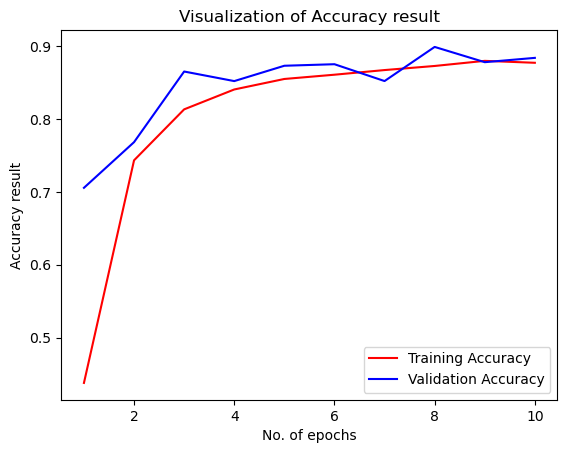

In [69]:
# ... rest of your code .
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'] ,color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'] ,color='blue',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of Accuracy result")
plt.legend()
plt.show()

In [70]:
## Some Other Metrics for model evaluation

In [72]:
class_name= validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [75]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)


Found 17572 files belonging to 38 classes.


In [76]:
y_pred=model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 188s 342ms/step


array([[9.55840468e-01, 8.77925951e-04, 6.49076901e-06, ...,
        1.36915705e-08, 2.65303925e-06, 3.91350113e-07],
       [9.04021859e-01, 5.86594641e-02, 6.66033884e-06, ...,
        2.72641358e-07, 3.47205423e-05, 1.00435926e-07],
       [9.99991059e-01, 6.89723947e-06, 7.47537143e-09, ...,
        1.97363388e-16, 1.30255273e-09, 1.67976077e-10],
       ...,
       [9.51265029e-05, 2.90726962e-06, 6.09852432e-04, ...,
        4.71715890e-02, 6.11409632e-06, 1.55834511e-01],
       [3.26544239e-07, 3.24703406e-14, 3.65405356e-07, ...,
        3.53080191e-04, 3.00510295e-13, 9.42931056e-01],
       [5.27141213e-11, 3.50347952e-13, 7.79434683e-10, ...,
        1.30708591e-04, 5.91357377e-07, 2.96473473e-01]], dtype=float32)

In [77]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [78]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ...,  3, 37, 33], dtype=int64)>

In [79]:
true_categories=tf.concat([y for x , y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [80]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,confusion_matrix

In [87]:
#precision recall fscore
print(classification_report(y_true, predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.81      0.87       504
                                 Apple___Black_rot       0.95      0.91      0.93       497
                          Apple___Cedar_apple_rust       0.86      0.89      0.87       440
                                   Apple___healthy       0.82      0.87      0.85       502
                               Blueberry___healthy       0.90      0.89      0.89       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.88      0.92       421
                 Cherry_(including_sour)___healthy       0.93      0.97      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.80      0.85       410
                       Corn_(maize)___Common_rust_       0.99      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.78      0.96      0.

In [90]:
cm=confusion_matrix(y_true,predicted_categories)
cm                    

array([[408,   4,   0, ...,   0,   0,   0],
       [  3, 452,   1, ...,   0,   2,   0],
       [  0,   2, 391, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 449,   0,   0],
       [  0,   0,   1, ...,   1, 420,   0],
       [  0,   0,   1, ...,   0,   0, 399]], dtype=int64)

In [96]:
### Confusion Matrix visuakization

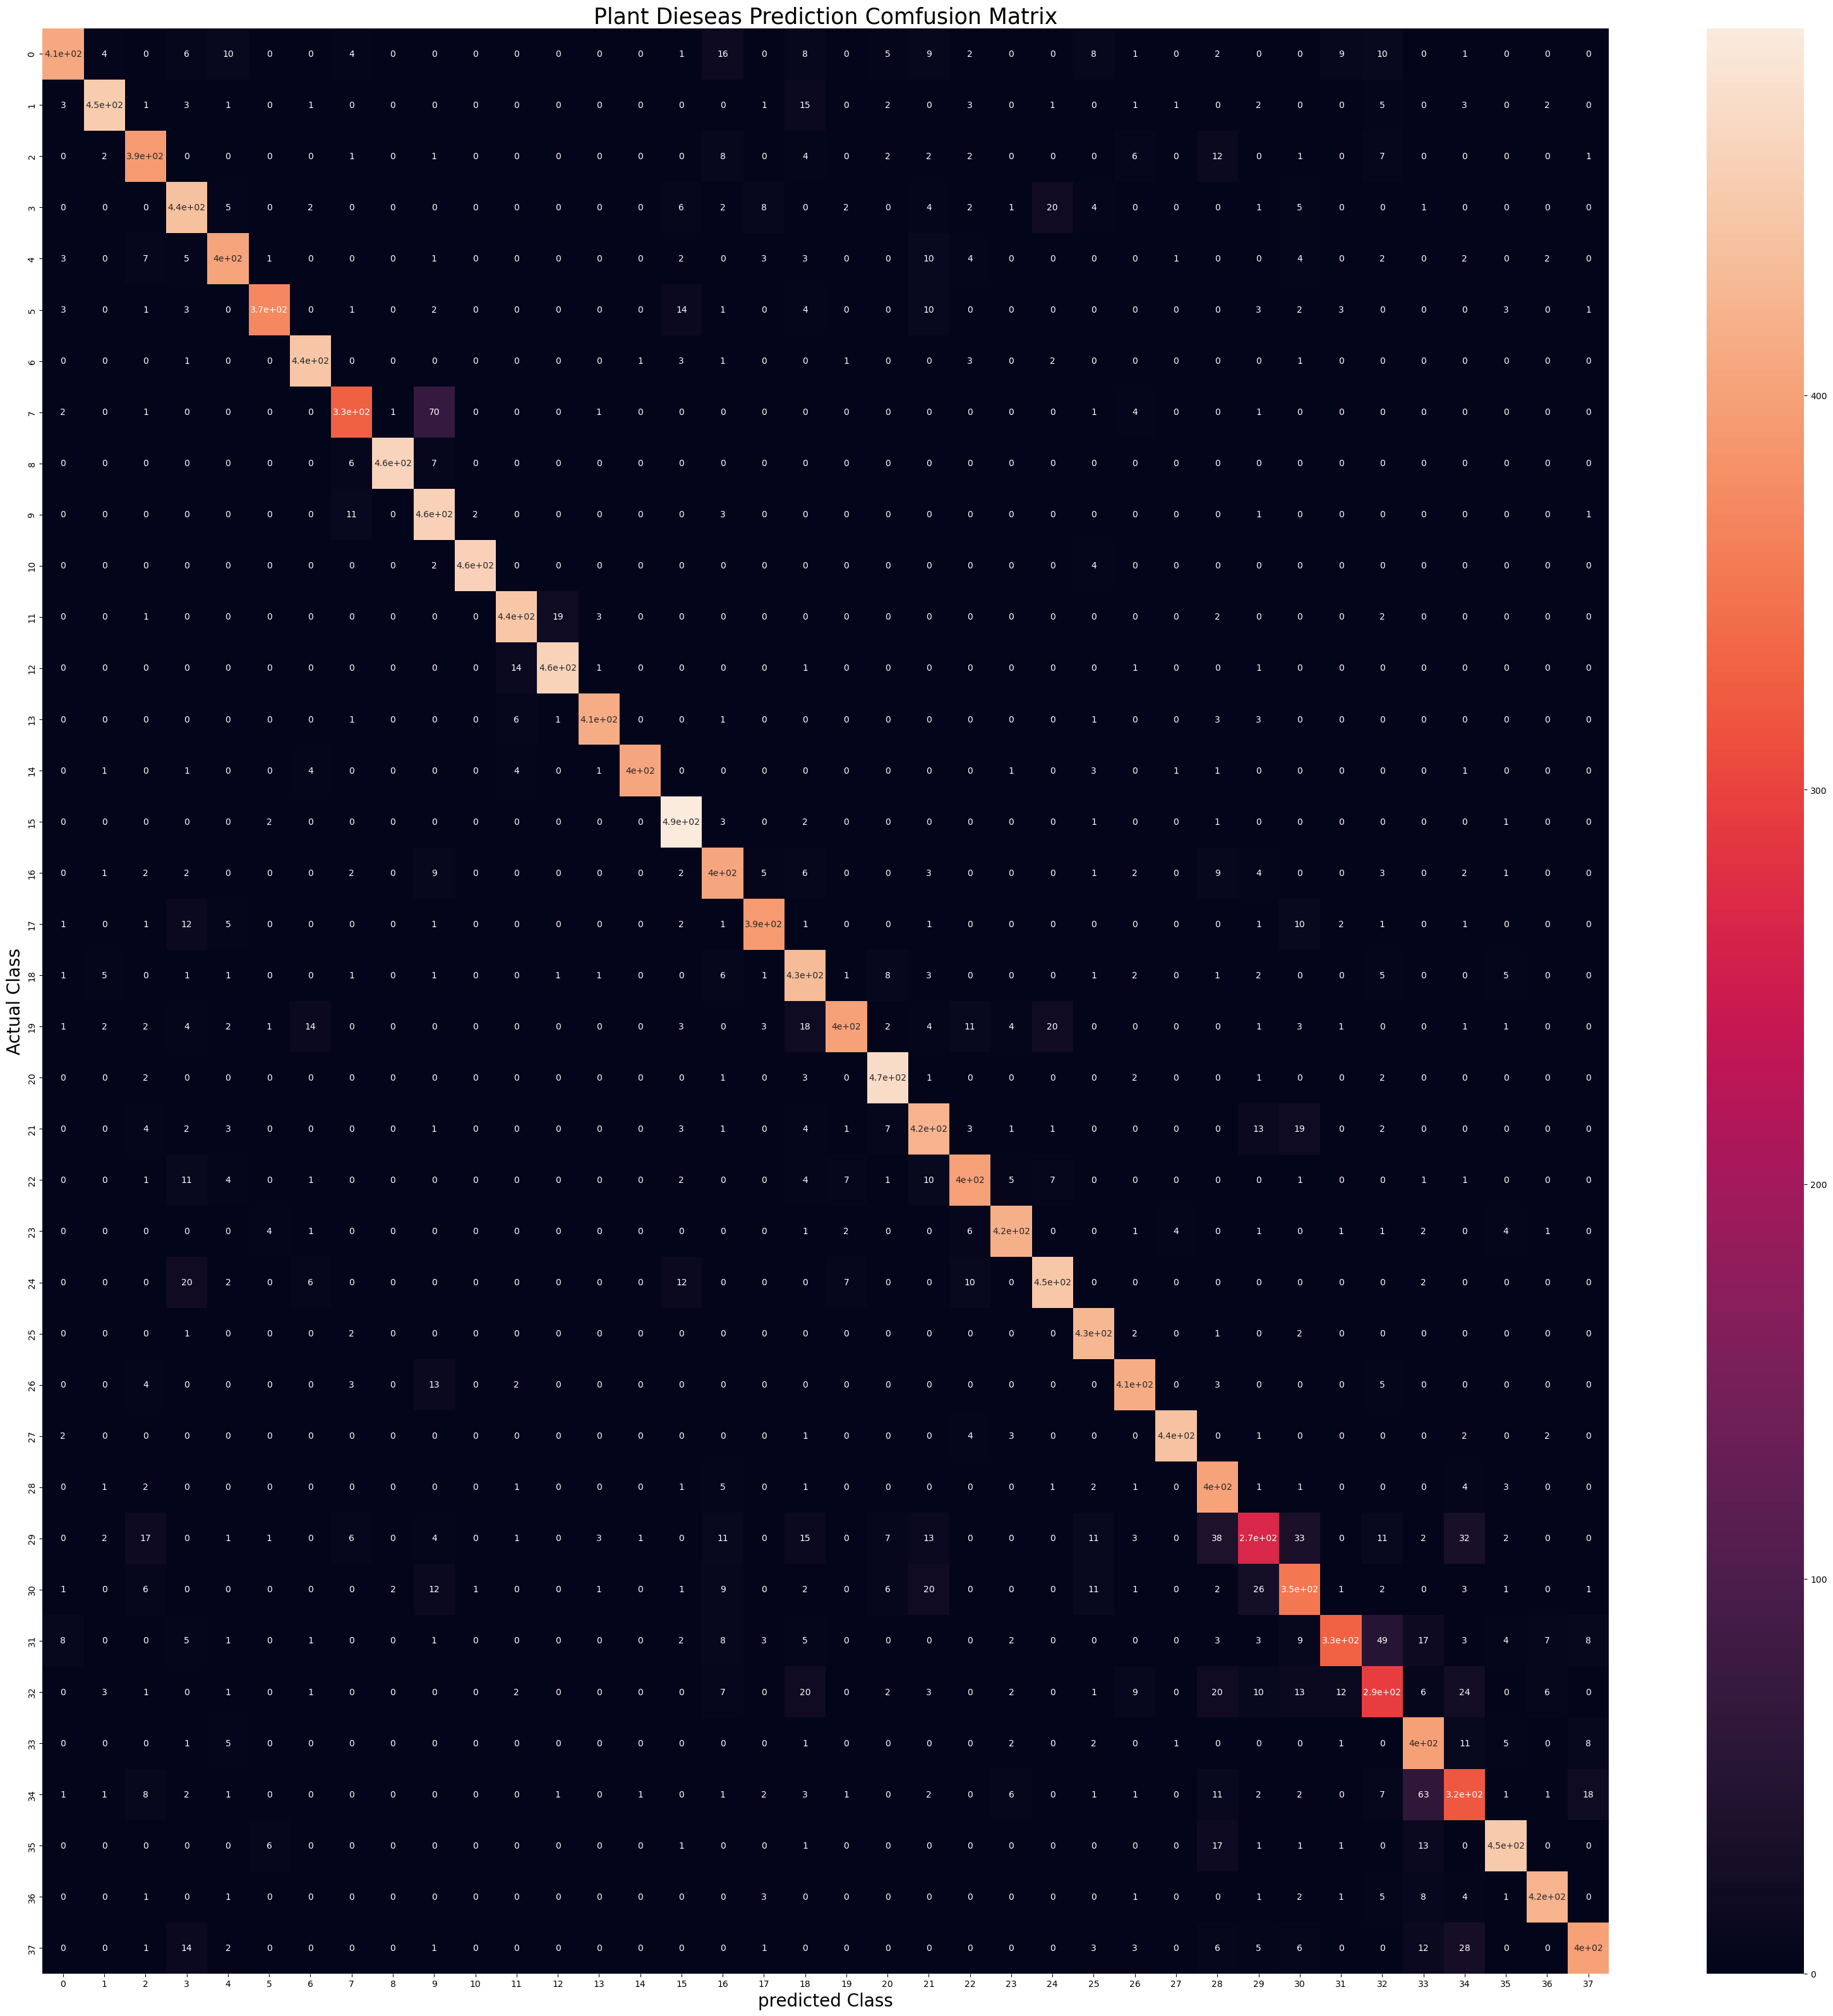

In [100]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot = True,annot_kws={"size":10})
plt.xlabel('predicted Class', fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Plant Dieseas Prediction Comfusion Matrix',fontsize = 25)
plt.show()